In [1]:
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline


In [2]:
# sustained index is defined by the mean of PSTH divided by max
def sustained_index(unit_psth):
    """unit_psth: neuron*time"""
    SI = np.zeros(np.shape(unit_psth)[0])
    for u in range(np.shape(unit_psth)[0]):
        # reshape to combine orientations and repeats
        tmp = unit_psth[u,:]
        SI[u]=np.mean(tmp)/max(tmp)
    return SI

from scipy.signal import find_peaks
def find_psth_peaks(x, prominence=1, width=20):
    peaks, properties = find_peaks(x, prominence=prominence, width=width)
    #print(properties["prominences"], properties["widths"])
    return peaks, properties

# plot all data (mixing the factors of mouse and cluster together)

In [3]:
df_new = pd.read_csv('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/population_psth_properties_RF_alltrials_removedlow_corrected.csv')


/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in less
/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in less
/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in less


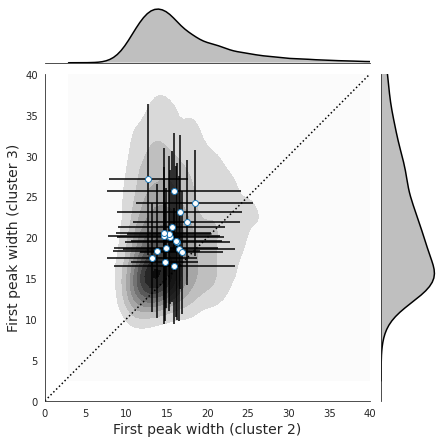

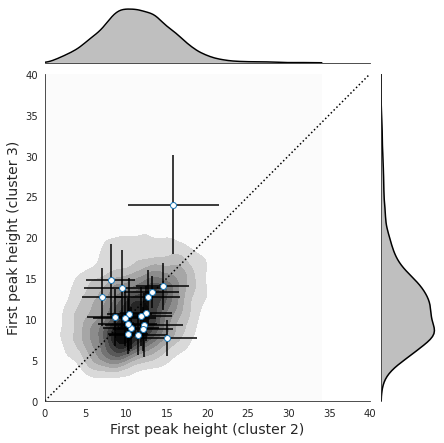

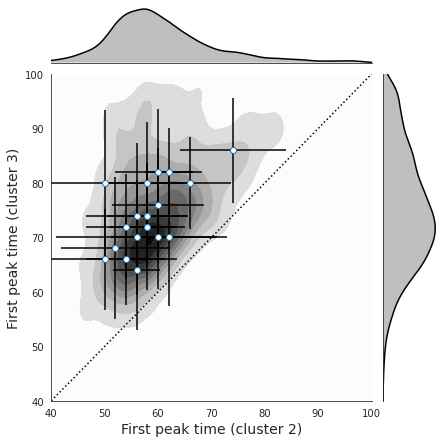

In [5]:
with sns.axes_style("white"):
    g=sns.jointplot(x=df_new[df_new['cluster_id']=='cluster2']['width'].values, 
                    y=df_new[df_new['cluster_id']=='cluster3']['width'].values, 
                    color='k', 
                    xlim=[0,40], ylim=[0,40],
                   dropna=True,
                    #marginal_kws=dict(bins=15),
                   kind='kde', 
                    #cbar=True
                   #joint_kws=joint_kws
                   );
g.ax_joint.collections[0].set_alpha(0.3)
lims = [max(0, 0), min(40, 40)]
g.ax_joint.plot(lims, lims, ':k')
g.set_axis_labels('First peak width (cluster 2)', 'First peak width (cluster 3)', fontsize=14)

mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
             '416856', '419114',  '419117', '419118', '419119', '424445',
             '415148', '416356','416861','419112','419116']

for mouse_ID in mouse_IDs:
    # plot the mean and std of individual mouse
    tmp2 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster2')].width.values
    tmp3 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster3')].width.values
    
    x = np.nanmedian(tmp2)
    xerr = np.nanstd(tmp2)
    y = np.nanmedian(tmp3)
    yerr = np.nanstd(tmp3)
    g.ax_joint.errorbar(x,y, xerr=xerr, yerr=yerr, ecolor='k', fmt='o', mfc='white', capthick=1)
    


with sns.axes_style("white"):
    g=sns.jointplot(x=df_new[df_new['cluster_id']=='cluster2']['height'].values, 
                    y=df_new[df_new['cluster_id']=='cluster3']['height'].values, 
                    color='k', 
                    xlim=[0,40], ylim=[0,40],
                   dropna=True,
                    #marginal_kws=dict(bins=20),
                   kind='kde', 
                    #cbar=True
                   );
g.ax_joint.collections[0].set_alpha(0.3)
#plt.xlabel('Peak height of cluster 2', fontsize=15)
#plt.ylabel('Peak height of cluster 3', fontsize=15)
lims = [max(0, 0), min(40, 40)]
g.ax_joint.plot(lims, lims, ':k') 
g.set_axis_labels('First peak height (cluster 2)', 'First peak height (cluster 3)', fontsize=14)

for mouse_ID in mouse_IDs:
    # plot the mean and std of individual mouse
    tmp2 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster2')].height.values
    x = np.nanmedian(tmp2)
    xerr = np.nanstd(tmp2)
    tmp3 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster3')].height.values
    y = np.nanmedian(tmp3)
    yerr = np.nanstd(tmp3)
    g.ax_joint.errorbar(x,y, xerr=xerr, yerr=yerr, ecolor='k', fmt='o', mfc='white', capthick=1)
    

joint_kws=dict(gridsize=30)
with sns.axes_style("white"):
    t2=df_new[df_new['cluster_id']=='cluster2']['time'].values
    t3=df_new[df_new['cluster_id']=='cluster3']['time'].values
    g=sns.jointplot(x=t2[np.where((t2<100) & (t3<100))[0]], 
                    y=t3[np.where((t2<100) & (t3<100))[0]], 
                    color='k', 
                    xlim=[40,100], ylim=[40,100],
                   dropna=True,
                    #marginal_kws=dict(bins=25),
                   kind='kde', 
                    #cbar=True
                   #joint_kws=joint_kws
                   );
g.ax_joint.collections[0].set_alpha(0.2)
#plt.xlabel('TTP of cluster 2', fontsize=15)
#plt.ylabel('TTP of cluster 3', fontsize=15)
lims = [min(40, 40), max(100, 100)]
g.ax_joint.plot(lims, lims, ':k') 

for mouse_ID in mouse_IDs:
    # plot the mean and std of individual mouse
    t2 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster2')].time.values
    t3 = df_new[(df_new.mouse_id==int(mouse_ID)) & (df_new.cluster_id=='cluster3')].time.values
    
    tmp2 = t2[np.where((t2<100) & (t3<100))[0]]
    tmp3 = t3[np.where((t2<100) & (t3<100))[0]]
    x = np.nanmedian(tmp2)
    xerr = np.nanstd(tmp2)
    
    y = np.nanmedian(tmp3)
    yerr = np.nanstd(tmp3)
    g.ax_joint.errorbar(x,y, xerr=xerr, yerr=yerr, ecolor='k', fmt='o', mfc='white', capthick=1)
    
g.set_axis_labels('First peak time (cluster 2)', 'First peak time (cluster 3)', fontsize=14)





In [59]:
# not normal, paired distribution are from the same or different distributions
from scipy.stats import wilcoxon
tmp1=df_new[df_new['cluster_id']=='cluster2']['width'].values
tmp2=df_new[df_new['cluster_id']=='cluster3']['width'].values
w, p = wilcoxon(tmp1, tmp2)
print(w, p)

4096258.0 1.3830644628556695e-292


/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/scipy/stats/morestats.py:2882: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/xiaoxuanj/anaconda/envs/newbase/lib/python3.6/site-packages/scipy/stats/morestats.py:2883: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [39]:
# statistics

from scipy.stats import ttest_ind
tmp1=df_new[df_new['cluster_id']=='cluster2']['width'].values
tmp2=df_new[df_new['cluster_id']=='cluster3']['width'].values
ttest_ind(tmp1[np.isnan(tmp1)!=1], tmp2[np.isnan(tmp2)!=1])

Ttest_indResult(statistic=-34.604834303736695, pvalue=3.352972001286487e-250)

In [40]:
len(df_new[df_new['cluster_id']=='cluster2']['width'].values)

6000

In [41]:
tmp1=df_new[df_new['cluster_id']=='cluster2']['height'].values
tmp2=df_new[df_new['cluster_id']=='cluster3']['height'].values
ttest_ind(tmp1[np.isnan(tmp1)!=1], tmp2[np.isnan(tmp2)!=1])


Ttest_indResult(statistic=-4.130778187103487, pvalue=3.639891008632271e-05)

In [42]:
tmp1=df_new[df_new['cluster_id']=='cluster2']['time'].values
tmp2=df_new[df_new['cluster_id']=='cluster3']['time'].values
ttest_ind(tmp1[np.isnan(tmp1)!=1], tmp2[np.isnan(tmp2)!=1])


Ttest_indResult(statistic=-19.566427616739585, pvalue=6.0447080263209265e-84)

In [43]:
tmp = df_new[df_new['cluster_id']=='cluster2']['width'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['width'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster2']['height'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['height'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster2']['time'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['time'].values
print(np.nanmean(tmp), np.nanstd(tmp)/np.sqrt(len((tmp))), len(tmp))


17.45023923067797 0.08471875634356081 6000
22.293191650155865 0.11136931401953981 6000
11.400672607376453 0.05679012020329822 6000
11.76663729314666 0.067981641095686 6000
74.69533333333334 0.4403476867876783 6000
85.59686562187396 0.3411732213617765 6000


In [44]:
tmp = df_new[df_new['cluster_id']=='cluster2']['width'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['width'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster2']['height'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['height'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster2']['time'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))

tmp = df_new[df_new['cluster_id']=='cluster3']['time'].values
print(tmp.mean(), tmp.std()/np.sqrt(len((tmp))), len(tmp))


17.45023923067797 0.08471875634356081 6000
nan nan 6000
11.400672607376453 0.05679012020329822 6000
nan nan 6000
74.69533333333334 0.4403476867876783 6000
nan nan 6000


In [45]:
np.nanmean(WW3)

20.242742273299616

# plot example population psth

In [6]:
def plot_fill_between(tmp, time, color='blue'):
    # tmp: neuron*time
    mean = np.mean(tmp, axis=0)
    error = np.std(tmp, axis=0)/np.sqrt(tmp.shape[0])
    plt.plot(time, mean, color = color, alpha=0.9)
    plt.fill_between(time, mean-error, mean+error, color = color, alpha=0.3)


In [9]:
def get_PSTH_alldim(unit_binarized, PSTH_bintime, value='mean', fs=1000):
    """Calculate PSTH averaged across trials based on binarized spike trains.
    unit_binarized: last dimension is time
    PSTH_bintime: dividable by unit_binarized.shape[-1]
    """
    unit_binarized=np.array(unit_binarized)
    unit_psth = unit_binarized.reshape(unit_binarized.shape[:-1] + (int(unit_binarized.shape[-1]/PSTH_bintime), PSTH_bintime))
    if value=='mean':
        unit_psth = unit_psth.mean(-1)
    if value=='count':
        unit_psth = unit_psth.sum(-1)
    time = np.array(range(int(unit_binarized.shape[-1]/PSTH_bintime)))*PSTH_bintime/1000.
    return unit_psth, time

In [11]:
unit_psth.shape

(368, 75, 1255)

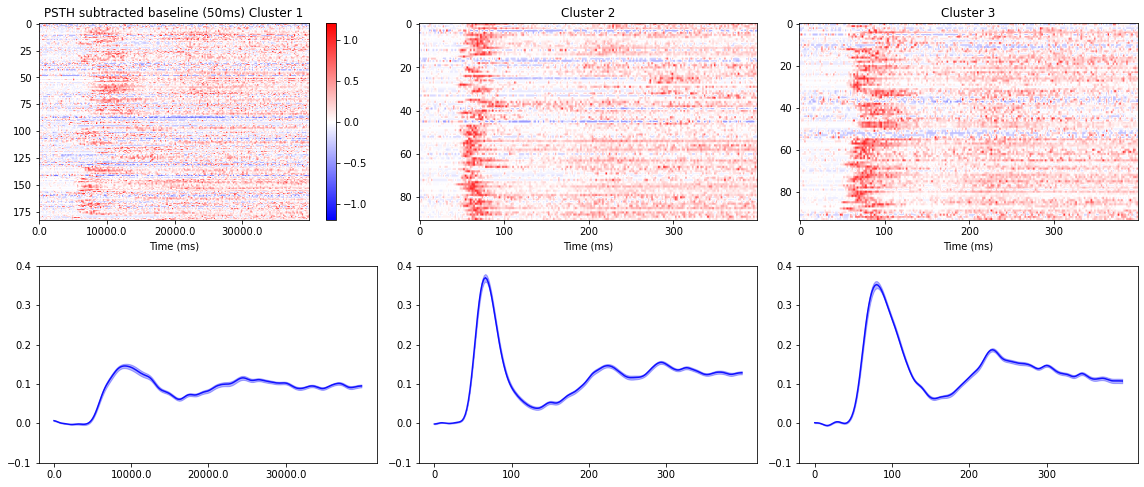

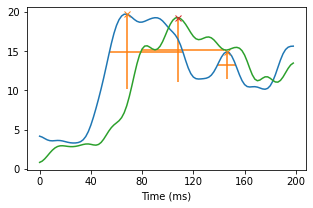

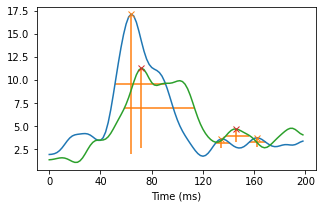

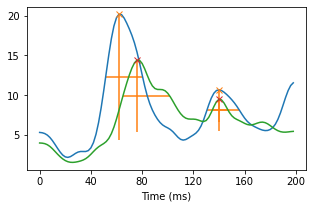

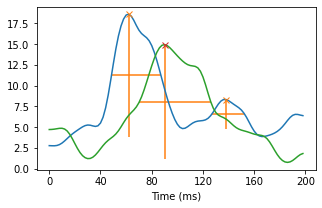

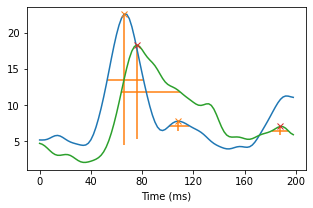

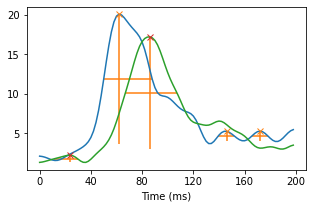

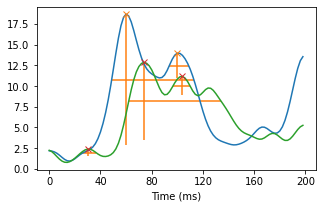

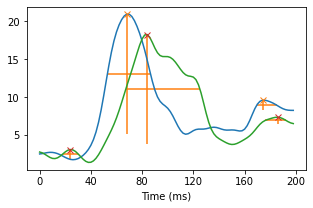

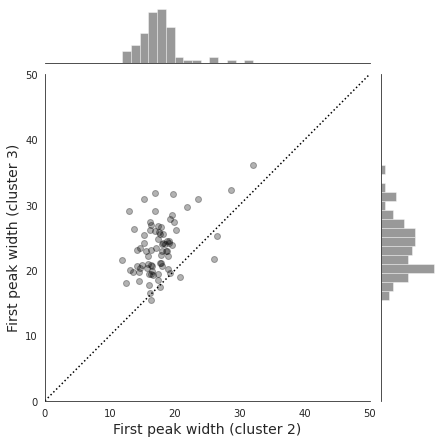

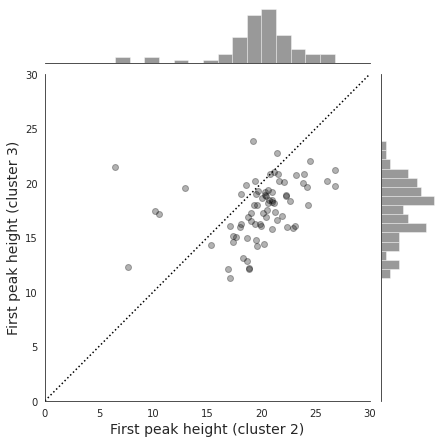

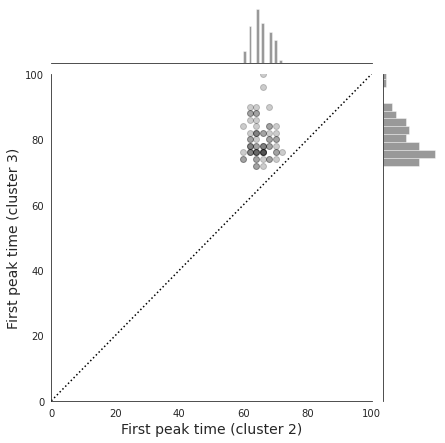

In [13]:
# select trials with number of spikes above threshold in a population
# bin size influence width detection parameter
PSTH_bintime=2
cmap_max=1.2

smooth=3


mouseID='412804'

# 1. load spikes
#basepath = '/Volumes/local1/work_allen/Ephys/mouse'+mouseID
basepath = '/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/example_psth/'

# spikes for preferred condition
spikes_pref = np.load(basepath+'psth_pref_trial.npy')
df_all = pd.read_csv(basepath+'mouse412804_cortex_meta.csv', index_col=0)
assert spikes_pref.shape[0]==len(df_all)

# 2. select units CCG cluster and RF on screen
df=pd.read_csv(basepath+'/mouse'+mouseID+'_meta_cluster.csv', index_col=0)

select_idx = []
for idx, row in df_all.iterrows():
    probe_id=row['probe_id']
    unit_id=row['unit_id']
    if unit_id in df[df.probe_id==probe_id].unit_id.values:
        select_idx.append(idx)      

spikes_pref = spikes_pref[select_idx, :, :]
assert spikes_pref.shape[0]==len(df)

labels=df.cluster.values

# calculate PSTH for 1. all condition: spikes 2. preferred: spikes_pref
unit_psth, time = get_PSTH_alldim(spikes_pref, PSTH_bintime=PSTH_bintime)
# convert to spk/sec
unit_psth = unit_psth/(PSTH_bintime/1000.)

unit_psth_mean=unit_psth.mean(1)
unit_psth_mean.shape

# scale to the same size
plt.figure(figsize=(16,10))
plt.subplot(331)
tmp = unit_psth_mean[np.where(labels==1)[0],:]
tmp_baseline=tmp[:,:int(400/PSTH_bintime)]-np.tile(tmp[:,:int(30/PSTH_bintime)].mean(1), (int(400/PSTH_bintime),1)).T
tmp_baseline_norm=tmp_baseline/np.tile(np.max(tmp_baseline, axis=1), (tmp_baseline.shape[1],1)).T
plt.imshow(tmp_baseline_norm,
           vmin=-cmap_max, vmax=cmap_max,
           cmap='bwr', 
           aspect='auto')

x_label=np.arange(0,int(400/PSTH_bintime),50)*400/PSTH_bintime
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.colorbar()
plt.title('PSTH subtracted baseline (50ms) Cluster 1')
plt.xlabel('Time (ms)')

plt.subplot(334)
ttmp = gaussian_filter(tmp_baseline_norm, 3)
plot_fill_between(ttmp, range(ttmp.shape[1]), color='blue')
#plt.errorbar(range(ttmp.shape[1]), ttmp.mean(0), ttmp.std(0)/np.sqrt(ttmp.shape[0]))
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.ylim([-0.1,0.4])

plt.subplot(332)
tmp = unit_psth_mean[np.where(labels==2)[0],:]
tmp_baseline=tmp[:,:int(400/PSTH_bintime)]-np.tile(tmp[:,:int(30/PSTH_bintime)].mean(1), (int(400/PSTH_bintime),1)).T
tmp_baseline_norm=tmp_baseline/np.tile(np.max(tmp_baseline, axis=1), (tmp_baseline.shape[1],1)).T
plt.imshow(tmp_baseline_norm,
           vmin=-cmap_max, vmax=cmap_max,
           cmap='bwr', 
           aspect='auto')
x_label=np.arange(0,int(400/PSTH_bintime),50)*PSTH_bintime
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.title('Cluster 2')
plt.xlabel('Time (ms)')

plt.subplot(335)
ttmp = gaussian_filter(tmp_baseline_norm, 3)
plot_fill_between(ttmp, range(ttmp.shape[1]), color='blue')
#plt.errorbar(range(ttmp.shape[1]), ttmp.mean(0), ttmp.std(0)/np.sqrt(ttmp.shape[0]))
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.ylim([-0.1,0.4])

plt.subplot(333)
tmp = unit_psth_mean[np.where(labels==3)[0],:]
tmp_baseline=tmp[:,:int(400/PSTH_bintime)]-np.tile(tmp[:,:int(30/PSTH_bintime)].mean(1), (int(400/PSTH_bintime),1)).T
tmp_baseline_norm=tmp_baseline/np.tile(np.max(tmp_baseline, axis=1), (tmp_baseline.shape[1],1)).T
plt.imshow(tmp_baseline_norm,
           vmin=-cmap_max, vmax=cmap_max,
           cmap='bwr', 
           aspect='auto') #len(np.where(labels==2)[0])/float(len(np.where(labels==3)[0]))
x_label=np.arange(0,int(400/PSTH_bintime),50)*PSTH_bintime
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.title('Cluster 3')
plt.xlabel('Time (ms)')

plt.subplot(336)
ttmp = gaussian_filter(tmp_baseline_norm, 3)
plot_fill_between(ttmp, range(ttmp.shape[1]), color='blue')
#plt.errorbar(range(ttmp.shape[1]), ttmp.mean(0), ttmp.std(0)/np.sqrt(ttmp.shape[0]))
plt.xticks(range(0,int(400/PSTH_bintime),50), x_label)
plt.ylim([-0.1,0.4])
plt.tight_layout()

unit_psth2 = unit_psth[np.where(labels==2)[0],:,:]
unit_psth3 = unit_psth[np.where(labels==3)[0],:,:]
n_trial=unit_psth2.shape[1]

W2=np.nan*np.ones(n_trial)
W3=np.nan*np.ones(n_trial)
H2=np.nan*np.ones(n_trial)
H3=np.nan*np.ones(n_trial)
T2=np.nan*np.ones(n_trial)
T3=np.nan*np.ones(n_trial)
R2=np.nan*np.ones(n_trial)
R3=np.nan*np.ones(n_trial)
for t in np.arange(n_trial):
    x2=gaussian_filter(unit_psth2[:,t,0:100].mean(0), smooth)
    peaks2, properties2=find_psth_peaks(x2, prominence=0.8, width=5)        
    x3=gaussian_filter(unit_psth3[:,t,0:100].mean(0), smooth)
    peaks3, properties3=find_psth_peaks(x3, prominence=0.8, width=5)
    if len(properties2["right_ips"]-properties2["left_ips"])>0:
        # select the peak with largest width and save
        idx = np.where((properties2["right_ips"]-properties2["left_ips"])==
                       max(properties2["right_ips"]-properties2["left_ips"]))[0]
        W2[t] = (properties2["right_ips"]-properties2["left_ips"])[idx]
        H2[t] = (x2[peaks2])[idx]
        T2[t] = peaks2[idx]*PSTH_bintime
        R2[t] = sum(unit_psth2[:,t,0:100].mean(0))
    if len(properties3["right_ips"]-properties3["left_ips"])>0:
        # select the peak with largest width and save
        idx = np.where((properties3["right_ips"]-properties3["left_ips"])==
                       max(properties3["right_ips"]-properties3["left_ips"]))[0]
        W3[t] = (properties3["right_ips"]-properties3["left_ips"])[idx]
        H3[t] = (x3[peaks3])[idx]
        T3[t]=peaks3[idx]*PSTH_bintime
        R3[t] = sum(unit_psth3[:,t,0:100].mean(0))

    #print(width2, width3)
    #print(height2, height3)

    if np.isnan(W2[t])!=1 and t%10==0:
        plt.figure(figsize=(5,3))
        plt.plot(x2)
        plt.plot(peaks2, x2[peaks2], "x")
        plt.vlines(x=peaks2, ymin=x2[peaks2] - properties2["prominences"],
                   ymax = x2[peaks2], color = "C1")
        plt.hlines(y=properties2["width_heights"], xmin=properties2["left_ips"],
                   xmax=properties2["right_ips"], color = "C1")


        plt.plot(x3)
        plt.plot(peaks3, x3[peaks3], "x")
        plt.vlines(x=peaks3, ymin=x3[peaks3] - properties3["prominences"],
                   ymax = x3[peaks3], color = "C1")
        plt.hlines(y=properties3["width_heights"], xmin=properties3["left_ips"],
                   xmax=properties3["right_ips"], color = "C1")
        plt.xticks(np.arange(0, 101, 20), np.arange(0, 101, 20)*PSTH_bintime)
        plt.xlabel('Time (ms)')
        #plt.ylim([0,20])

        #plt.plot(spikes_select3[n,t,10*PSTH_bintime:100*PSTH_bintime]*1000)
        #print(W2[t], H2[t], T2[t], W3[t], H3[t], T3[t])


with sns.axes_style("white"):
    g=sns.jointplot(x=W2, y=W3, color="k", xlim=[0,50], ylim=[0,50],
                   marginal_kws=dict(bins=15),);
#plt.xlabel('Peak width of cluster 2', fontsize=15)
#plt.ylabel('Peak width of cluster 3', fontsize=15)
g.ax_joint.collections[0].set_alpha(0.3)
lims = [max(0, 0), min(50, 50)]
g.ax_joint.plot(lims, lims, ':k')
g.set_axis_labels('First peak width (cluster 2)', 'First peak width (cluster 3)', fontsize=14)


with sns.axes_style("white"):
    g=sns.jointplot(x=H2, y=H3, color="k", xlim=[0,30], ylim=[0,30],
                   marginal_kws=dict(bins=15),);
g.ax_joint.collections[0].set_alpha(0.3)
#plt.xlabel('Peak height of cluster 2', fontsize=15)
#plt.ylabel('Peak height of cluster 3', fontsize=15)
lims = [max(0, 0), min(30, 30)]
g.ax_joint.plot(lims, lims, ':k') 
g.set_axis_labels('First peak height (cluster 2)', 'First peak height (cluster 3)', fontsize=14)

with sns.axes_style("white"):
    g=sns.jointplot(x=T2[np.where((T2<120) & (T3<150))[0]], y=T3[np.where((T2<120) & (T3<150))[0]],  
                    color="k", xlim=[0,100], ylim=[0,100],
                   marginal_kws=dict(bins=15),);
g.ax_joint.collections[0].set_alpha(0.2)
#plt.xlabel('TTP of cluster 2', fontsize=15)
#plt.ylabel('TTP of cluster 3', fontsize=15)
lims = [max(0, 0), min(100, 100)]
g.ax_joint.plot(lims, lims, ':k') 
g.set_axis_labels('First peak time (cluster 2)', 'First peak time (cluster 3)', fontsize=14)
